# 1. Introduction to Seaborn
What is Seaborn?
- Python data visualization library
- Easily create the most common types of plots

In [135]:
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("data/"))

['countries-of-the-world.csv', 'mpg.csv', 'student-alcohol-consumption.csv', 'young-people-survey-responses.csv']


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Scatter plot

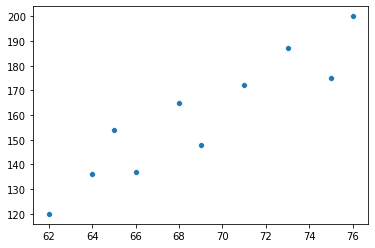

In [2]:
height = [62, 64, 69, 75, 66, 
          68, 65, 71, 76, 73]

weight = [120, 136, 148, 175, 137, 
          165, 154, 172, 200, 187]

sns.scatterplot(x=height, y=weight)
plt.show()

#### Count plot

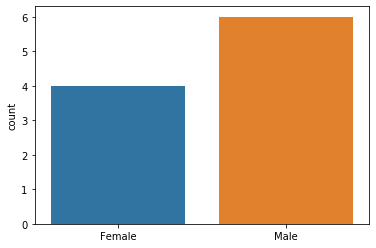

In [3]:
gender = ["Female", "Female", "Female", "Female", 
          "Male", "Male", "Male", "Male", "Male", "Male"]

sns.countplot(x=gender)
plt.show()

#### Using Pandas with Seaborn
What is pandas?
- Python library for data analysis
- Easily read datasets from csv, txt, and other types of files
- Datasets take the form of DataFrame objects

In [4]:
# import all the data
sac = pd.read_csv("data/student-alcohol-consumption.csv", index_col=0)
cotw = pd.read_csv("data/countries-of-the-world.csv")
mpg = pd.read_csv("data/mpg.csv")
ypsr = pd.read_csv("data/young-people-survey-responses.csv", index_col=0)

# I modify the column name so that I can use df dot column name more easily
cotw = cotw.rename(columns={'Country': 'country', 'Region': 'region', 'Population': 'population', 
                            'Area (sq. mi.)': 'area', 'Pop. Density (per sq. mi.)': 'pop_density', 
                            'Coastline (coast/area ratio)': 'coastline', 'Net migration': 'net_migration', 
                            'Infant mortality (per 1000 births)': 'infant_mortality', 
                            'GDP ($ per capita)': 'gdp', 'Literacy (%)': 'literacy', 
                            'Phones (per 1000)': 'phones', 'Arable (%)': 'arable', 'Crops (%)': 'crops', 
                            'Other (%)': 'other', 'Climate': 'climate', 'Birthrate': 'birthrate', 
                            'Deathrate': 'deathrate', 'Agriculture': 'agriculture', 
                            'Industry': 'industry', 'Service': 'service'})

#### Making a scatter plot with lists

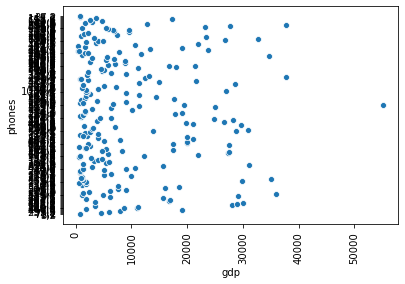

In [7]:
# Create a scatter plot with "gdp" on the x-axis and "phones" on the y-axis
sns.scatterplot(x='gdp', y='phones', data=cotw)
plt.xticks(rotation=90)

# Display the plot
plt.show()

#### Making a count plot with a list

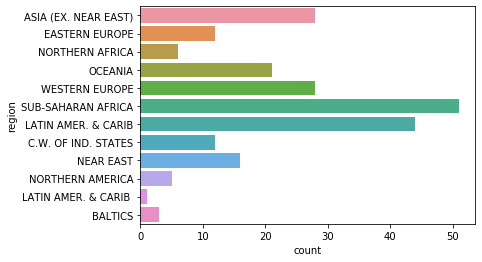

In [8]:
# Create a count plot with "region" on the y-axis
sns.countplot(y='region', data=cotw)

# Display the plot
plt.show()

#### Tips dataset

In [9]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### A basic scatter plot

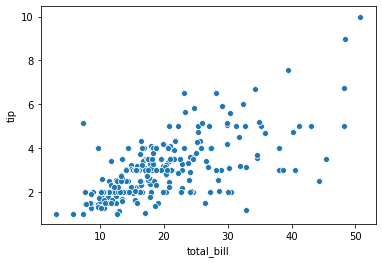

In [10]:
sns.scatterplot(x="total_bill", 
                y="tip", data=tips)
plt.show()

#### A scatter plot with hue

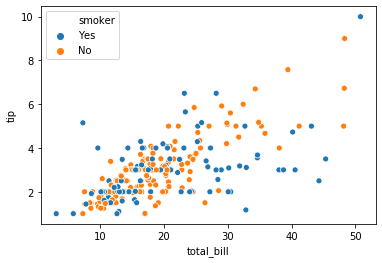

In [11]:
sns.scatterplot(x="total_bill", y="tip", 
                data=tips, hue="smoker")
plt.show()

#### Setting hue order

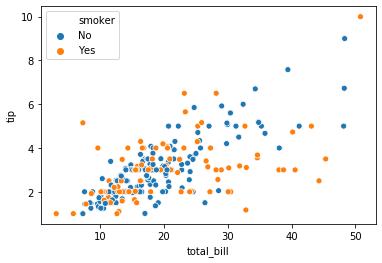

In [12]:
sns.scatterplot(x="total_bill", y="tip", data=tips, 
                hue="smoker", hue_order=["No", "Yes"])
plt.show()

#### Specifying hue colors

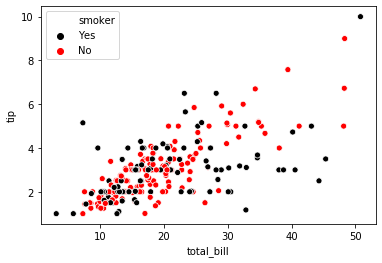

In [13]:
hue_colors = {"Yes": "black", "No": "red"}

sns.scatterplot(x="total_bill", y="tip", data=tips, 
                hue="smoker", palette=hue_colors)
plt.show()

#### Using HTML hex color codes with hue

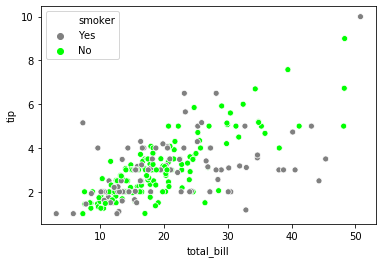

In [14]:
hue_colors = {"Yes": "#808080", "No": "#00FF00"}

sns.scatterplot(x="total_bill", y="tip", 
                data=tips, hue="smoker", palette=hue_colors)
plt.show()

#### Using hue with count plots

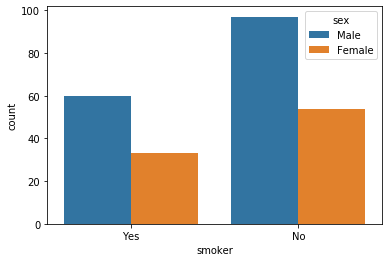

In [15]:
sns.countplot(x="smoker", 
              data=tips, hue="sex")
plt.show()

#### Adding a third variable with hue

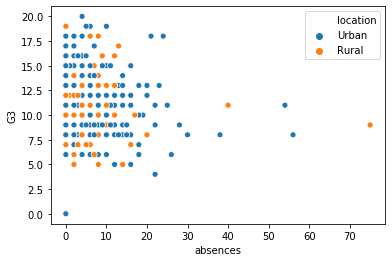

In [16]:
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences", y="G3", 
                data=sac, hue="location")

# Show plot
plt.show()

#### Hue and scatter plots

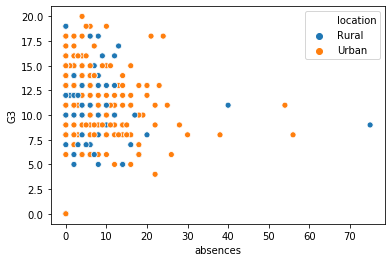

In [17]:
# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=sac, 
                hue="location", 
                hue_order=["Rural", "Urban"])

# Show plot
plt.show()

#### Hue and count plots

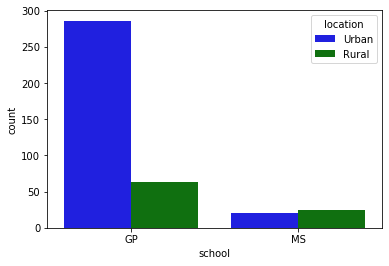

In [18]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=sac, 
              palette=palette_colors, hue="location")

# Display plot
plt.show()

# 2. Introduction to relational plots and subplots
Questions about quantitative variables - Relational plots
- Height vs. weight
- Number of school absences vs. final grade
- GDP vs. percent literate

#### Introducing `relplot()`
Create "relational plots": scatter plots or line plots

#### Why use `relplot()` instead of `scatterplot()` ?
`relplot()` lets you create subplots in a single figure

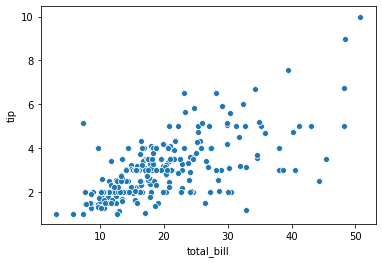

In [19]:
# Using scatterplot()
sns.scatterplot(x="total_bill", 
                y="tip", data=tips)
plt.show()

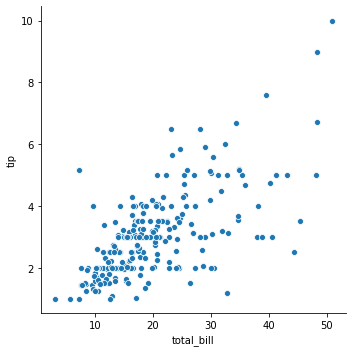

In [20]:
# Using relplot()
sns.relplot(x="total_bill", y="tip", 
            data=tips, kind="scatter")
plt.show()

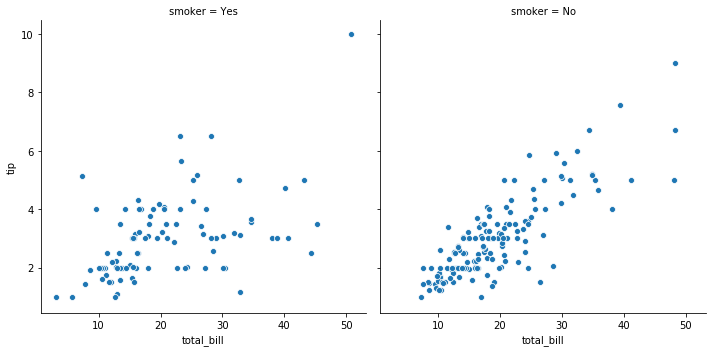

In [21]:
# Subplots in columns
sns.relplot(x="total_bill", y="tip", 
            data=tips, kind="scatter", col="smoker")
plt.show()

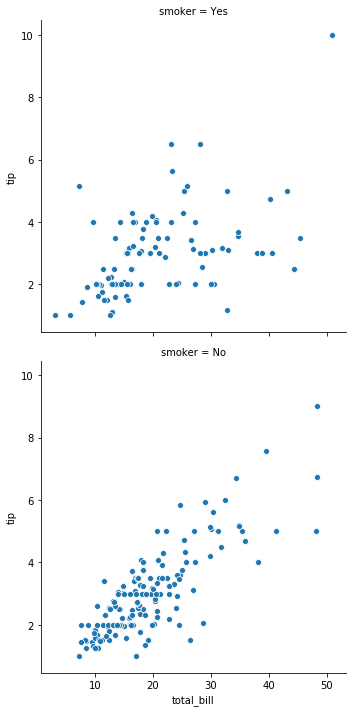

In [22]:
# Subplots in rows
sns.relplot(x="total_bill", y="tip", 
            data=tips, kind="scatter", row="smoker")
plt.show()

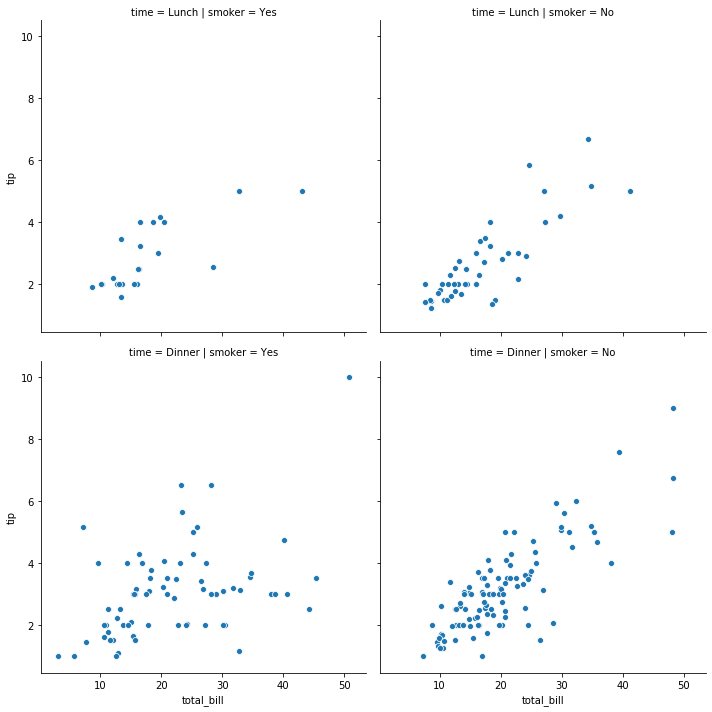

In [23]:
# Subplots in rows and columns
sns.relplot(x="total_bill", y="tip", data=tips, 
            kind="scatter", col="smoker", row="time")
plt.show()

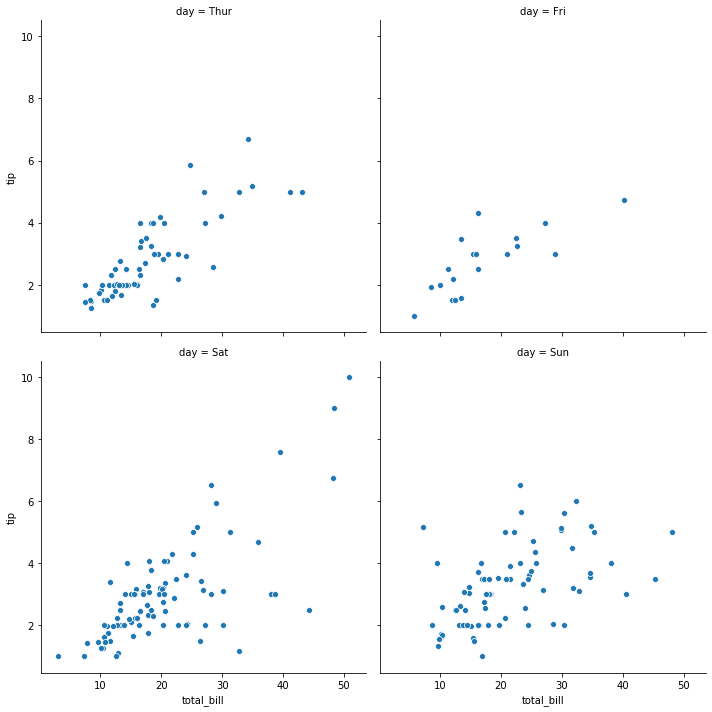

In [24]:
#### Subgroups for days of the week: Wrapping columns
sns.relplot(x="total_bill", y="tip", data=tips, 
            kind="scatter", col="day", col_wrap=2)
plt.show()

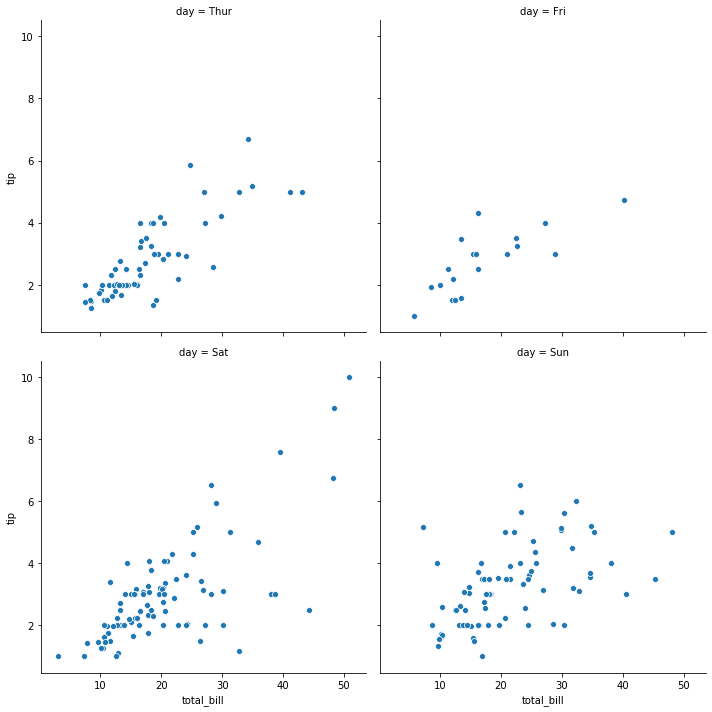

In [25]:
# Ordering columns
sns.relplot(x="total_bill", y="tip", data=tips, 
            kind="scatter", col="day", col_wrap=2, 
            col_order=["Thur", "Fri", "Sat", "Sun"])
plt.show()

#### Creating subplots with col and row

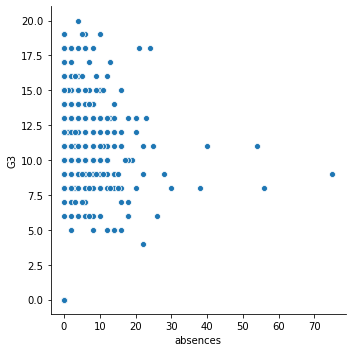

In [26]:
# Change to use relplot() instead of scatterplot()
sns.relplot(x="absences", y="G3", 
                data=sac, kind="scatter")

# Show plot
plt.show()

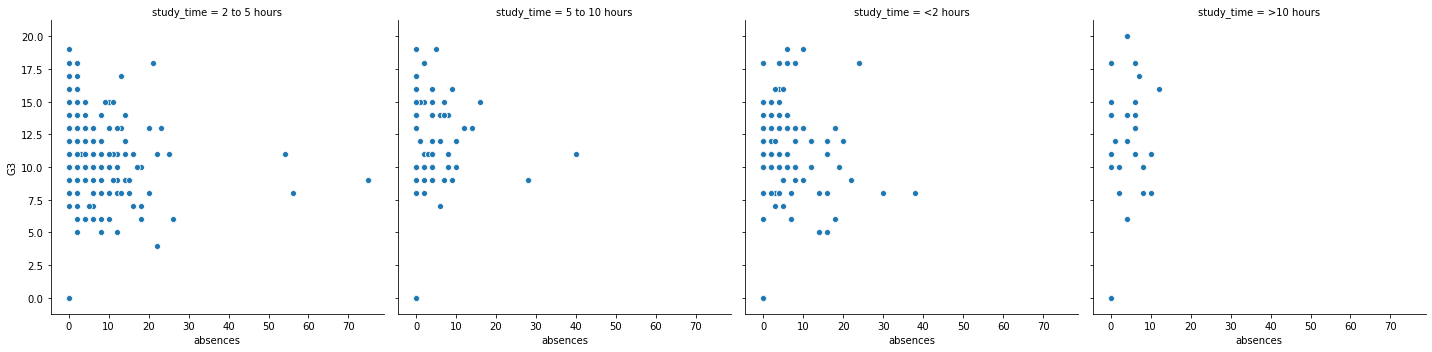

In [27]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3", 
            data=sackind="scatter", col="study_time")

# Show plot
plt.show()

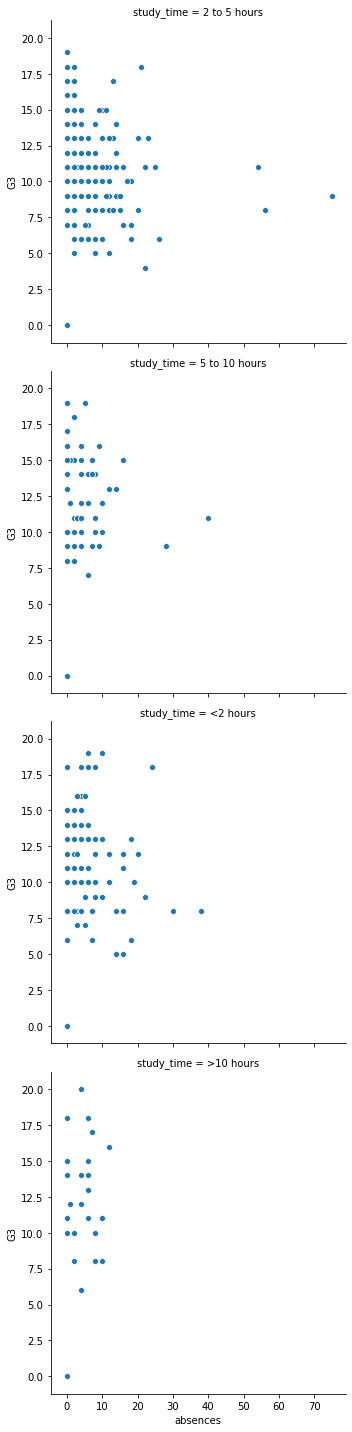

In [28]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", 
            data=sac, kind="scatter", row="study_time")

# Show plot
plt.show()

#### Creating two-factor subplots

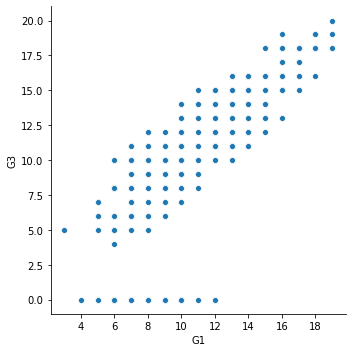

In [29]:
# Create a scatter plot of G1 vs. G3
sns.relplot(x="G1", y="G3", 
            data=sac, kind="scatter")

# Show plot
plt.show()

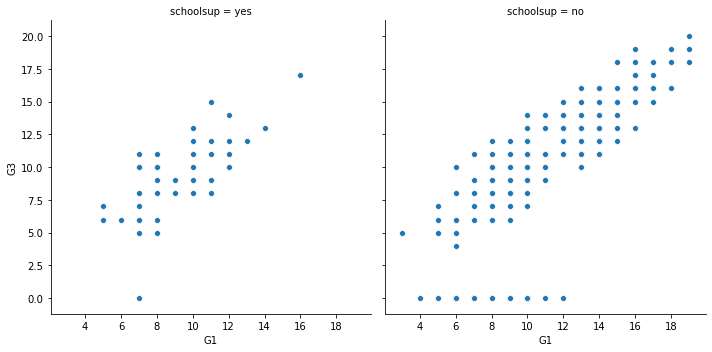

In [30]:
# Adjust to add subplots based on school support
sns.relplot(x="G1", y="G3", data=sac,
            kind="scatter", col="schoolsup", 
            col_order=(["yes","no"]))

# Show plot
plt.show()

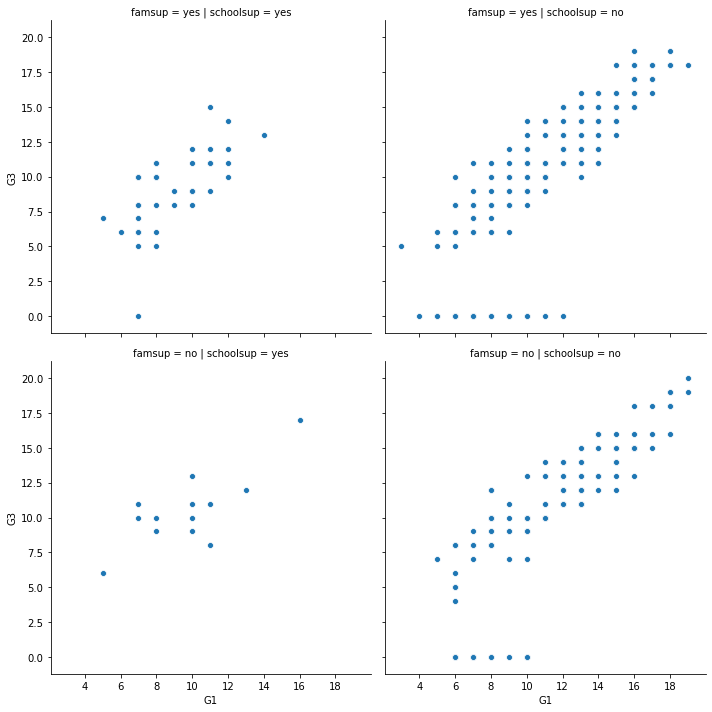

In [31]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3",  data=sac, kind="scatter", 
            col="schoolsup", col_order=["yes",  "no"], 
            row="famsup", row_order=(["yes", "no"]))

# Show plot
plt.show()

#### Customizing scatter plots
Show relationship between two quantitative variables

We've seen:
- Subplots ( col and row )
- Subgroups with color ( hue )

New Customizations:
- Subgroups with point size and style
- Changing point transparency

Use with both `scatterplot()` and `relplot()`

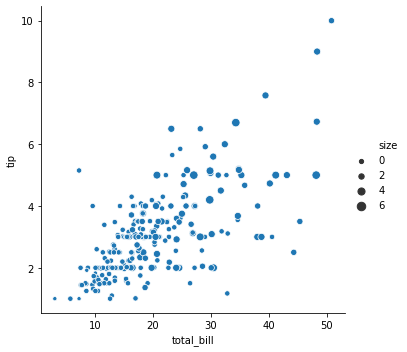

In [32]:
# Subgroups with point size
sns.relplot(x="total_bill", y="tip", 
            data=tips, kind="scatter", size="size")
plt.show()

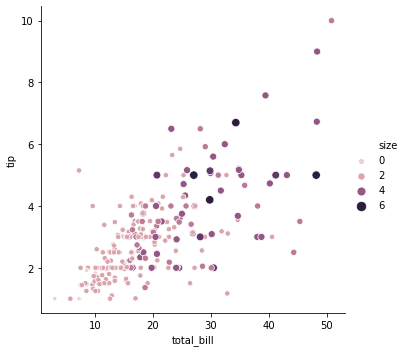

In [33]:
# Point size and hue
sns.relplot(x="total_bill", y="tip", data=tips, 
            kind="scatter", size="size", hue="size")
plt.show()

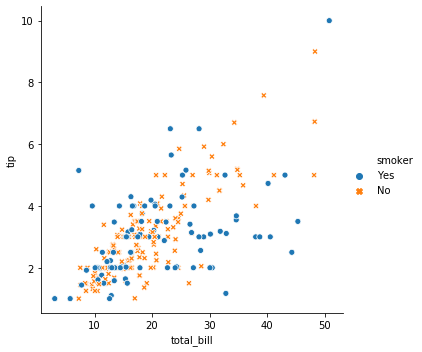

In [34]:
# Subgroups with point style
sns.relplot(x="total_bill", y="tip", data=tips, 
            kind="scatter", hue="smoker", style="smoker")
plt.show()

#### Changing point transparency

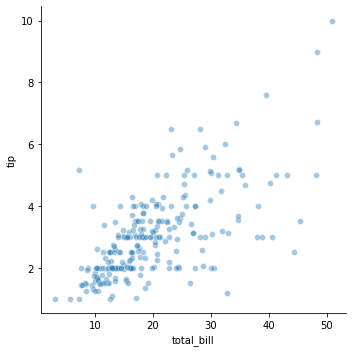

In [35]:
# Set alpha to be between 0 and 1
sns.relplot(x="total_bill", y="tip", 
            data=tips, kind="scatter", alpha=0.4)
plt.show()

#### Changing the size of scatter plot points

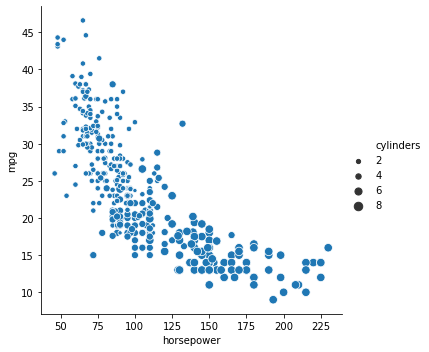

In [36]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", size="cylinders")

# Show plot
plt.show()

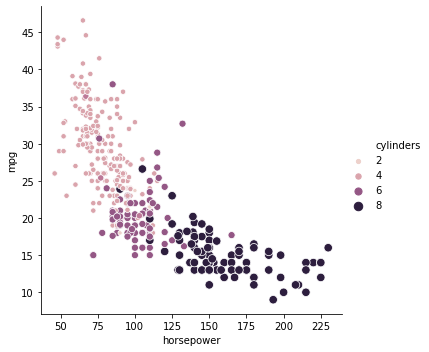

In [37]:
# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue="cylinders")

# Show plot
plt.show()

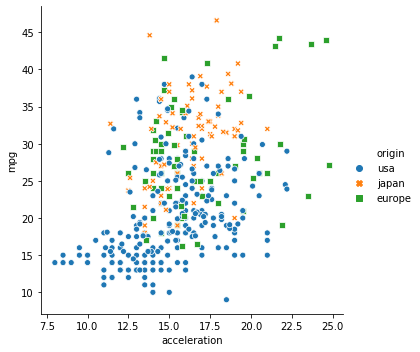

In [38]:
# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration", y="mpg", 
            data=mpg, hue="origin", kind="scatter", style="origin")

# Show plot
plt.show()

#### Introduction to line plots
What are line plots?

Two types of relational plots: scatter plots and line plots
- Scatter plots
  - Each plot point is an independent observation
- Line plots
  - Each plot point represents the same "thing", typically tracked over time

In [39]:
import numpy as np

hour = np.random.randint(10, 25, size=100)
NO_2 = np.random.randint(1, 65, size=100)
NO_2_mean = np.random.randint(1, 31, size=100)
station = np.random.randint(28079000, 28079100, size=100)
location = ['East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East', 
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East', 
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East', 
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
            'East', 'North', 'South', 'West', 'East', 'South', 'North', 'North', 'West', 'East',
           ]

In [40]:
data = {'hour': hour, 
        'NO_2': NO_2,
        'NO_2_mean': NO_2_mean,
        'station': station, 
        'location': location}
air_pollution = pd.DataFrame(data)

#### Scatter plot

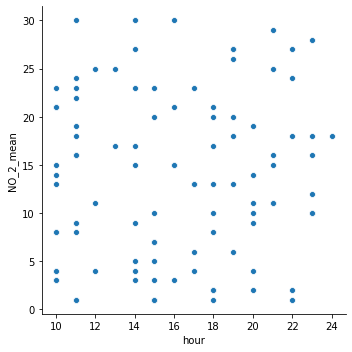

In [41]:
sns.relplot(x="hour", y="NO_2_mean", 
            data=air_pollution, kind="scatter")
plt.show()

#### Line plot

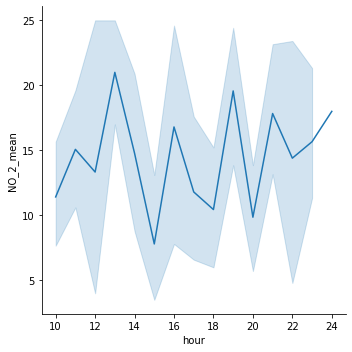

In [42]:
sns.relplot(x="hour", y="NO_2_mean", 
            data=air_pollution, kind="line")
plt.show()

#### Subgroups by location

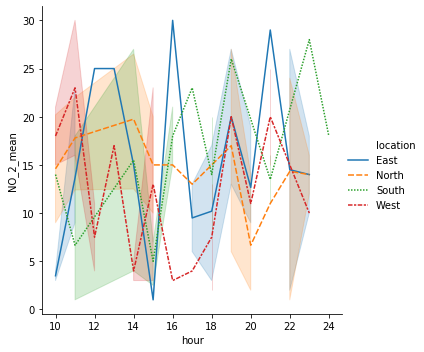

In [43]:
sns.relplot(x="hour", y="NO_2_mean", data=air_pollution, 
            kind="line", style="location", hue="location")
plt.show()

#### Adding markers

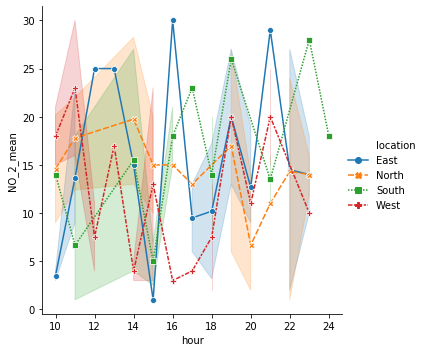

In [44]:
sns.relplot(x="hour", y="NO_2_mean", data=air_pollution, 
            kind="line", style="location", hue="location", markers=True)
plt.show()

#### Turning off line style

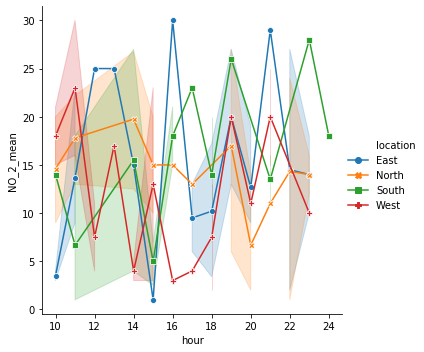

In [45]:
sns.relplot(x="hour", y="NO_2_mean", data=air_pollution, kind="line", 
            style="location", hue="location", markers=True, dashes=False)
plt.show()

#### Multiple observations per x-value

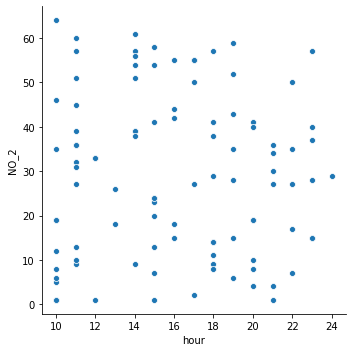

In [46]:
sns.relplot(x="hour", y="NO_2", 
            data=air_pollution, kind="scatter")
plt.show()

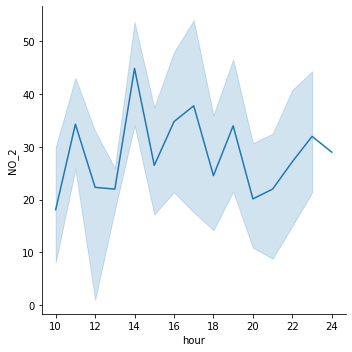

In [47]:
sns.relplot(x="hour", y="NO_2", 
            data=air_pollution, kind="line")
plt.show()

#### Replacing confidence interval with standard deviation

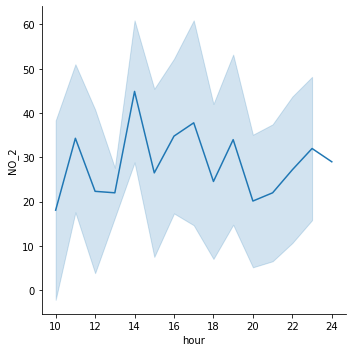

In [48]:
sns.relplot(x="hour", y="NO_2", 
            data=air_pollution, kind="line", ci="sd")
plt.show()

#### Turning off confidence interval

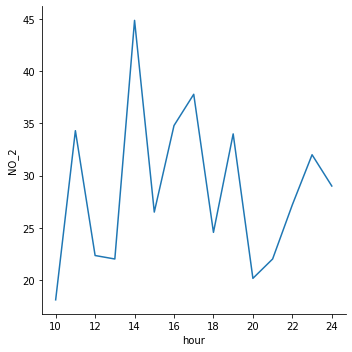

In [49]:
sns.relplot(x="hour", y="NO_2", 
            data=air_pollution, kind="line", ci=None)
plt.show()

#### Interpreting line plots

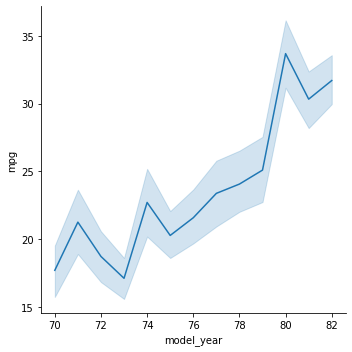

In [50]:
# Create line plot
sns.relplot(x="model_year", y="mpg", 
            data=mpg, kind="line")

# Show plot
plt.show()

#### Visualizing standard deviation with line plots

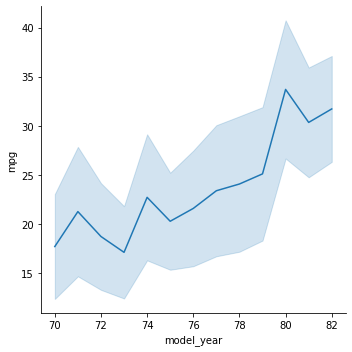

In [51]:
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", ci="sd")

# Show plot
plt.show()

#### Plotting subgroups in line plots

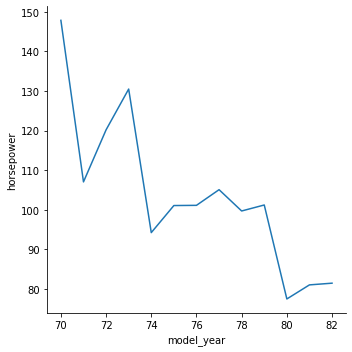

In [52]:
# Create line plot of model year vs. horsepower
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", ci=None)

# Show plot
plt.show()

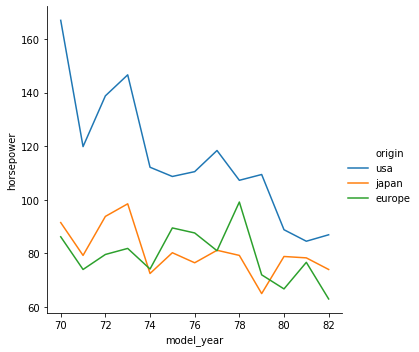

In [53]:
# Change to create subgroups for country of origin
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, hue="origin")

# Show plot
plt.show()

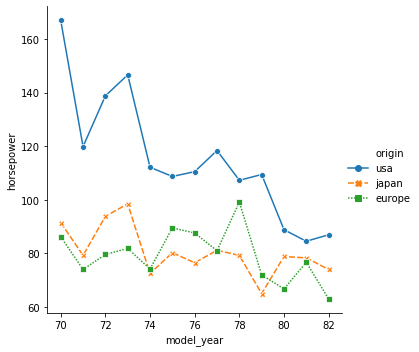

In [54]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True)

# Show plot
plt.show()

# 3. Count plots and bar plots

Categorical plots
- Examples: count plots, bar plots
- Involve a categorical variable
- Comparisons between groups

`catplot()`
- Used to create categorical plots
- Same advantages of relplot()
- Easily create subplots with col= and row=

`countplot()` vs. `catplot()`

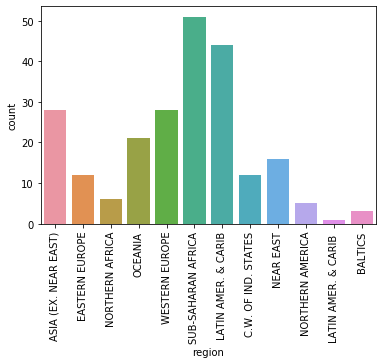

In [55]:
sns.countplot(x="region", data=cotw)

plt.xticks(rotation=90)
plt.show()

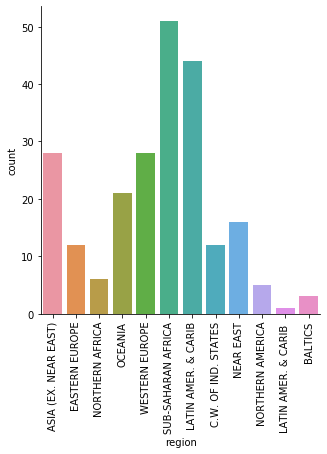

In [56]:
sns.catplot(x="region", 
            data=cotw, kind="count")

plt.xticks(rotation=90)
plt.show()

#### Changing the order

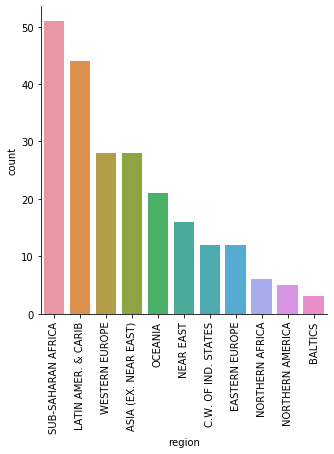

In [58]:
category_order = ["SUB-SAHARAN AFRICA", 
                  "LATIN AMER. & CARIB", 
                  "WESTERN EUROPE", 
                  "ASIA (EX. NEAR EAST)", 
                  "OCEANIA", 
                  "NEAR EAST", 
                  "C.W. OF IND. STATES", 
                  "EASTERN EUROPE", 
                  "NORTHERN AFRICA", 
                  "NORTHERN AMERICA", 
                  "BALTICS"]

sns.catplot(x="region", data=cotw, 
            kind="count", order=category_order)

plt.xticks(rotation=90)
plt.show()

#### Bar plots
Displays mean of quantitative variable per category

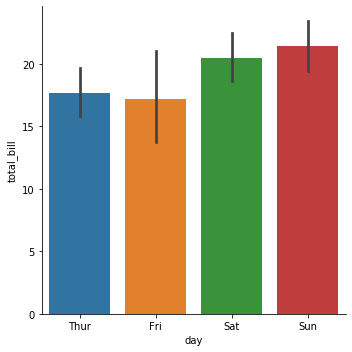

In [59]:
sns.catplot(x="day", y="total_bill", 
            data=tips, kind="bar")
plt.show()

#### Confidence intervals
- Lines show 95% confidence intervals for the mean
- Shows uncertainty about our estimate
- Assumes our data is a random sample

#### Turning off confidence intervals

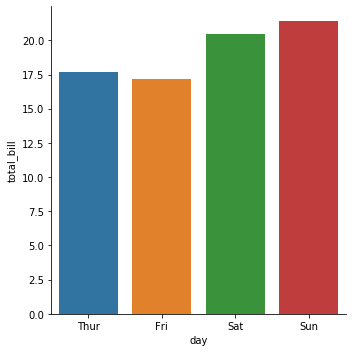

In [60]:
sns.catplot(x="day", y="total_bill", 
            data=tips, kind="bar", ci=None)
plt.show()

#### Changing the orientation

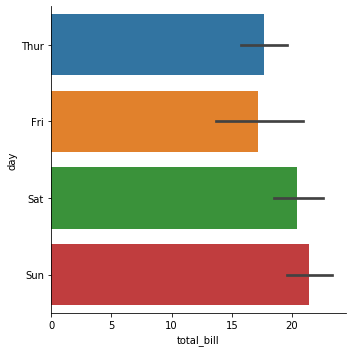

In [61]:
sns.catplot(x="total_bill", y="day", 
            data=tips, kind="bar")
plt.show()

#### Count plots

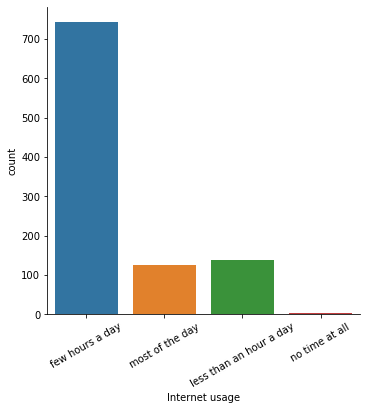

In [64]:
# Create count plot of internet usage
sns.catplot(x="Internet usage", 
            data=ypsr, kind="count")

# Rotate x-tick labels
plt.xticks(rotation=30)

# Show plot
plt.show()

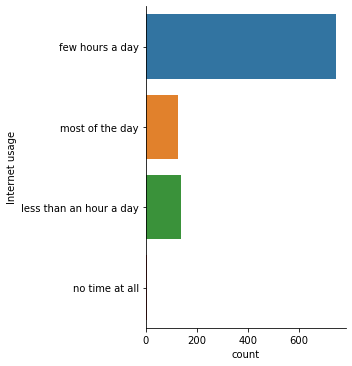

In [210]:
# Change the orientation of the plot
sns.catplot(y="Internet usage", data=ypsr,
            kind="count")

# Show plot
plt.show()

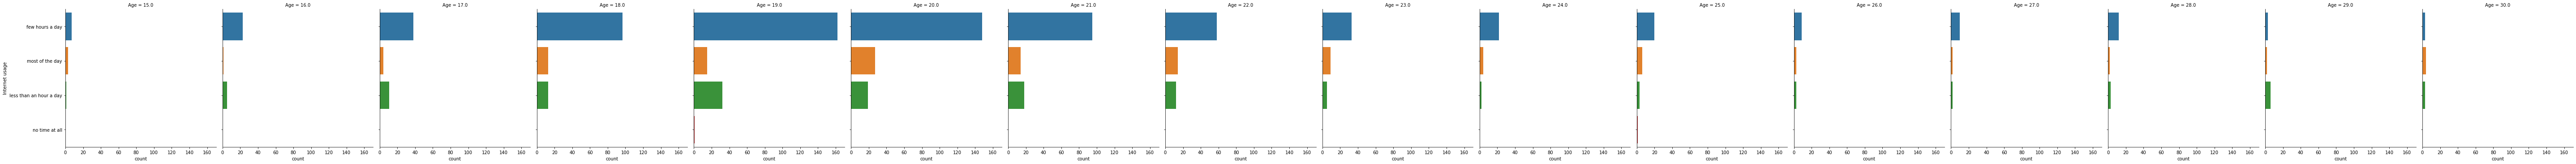

In [65]:
# Create column subplots based on age category
sns.catplot(y="Internet usage", data=ypsr,
            kind="count", col="Age")

# Show plot
plt.show()

#### Bar plots with percentages

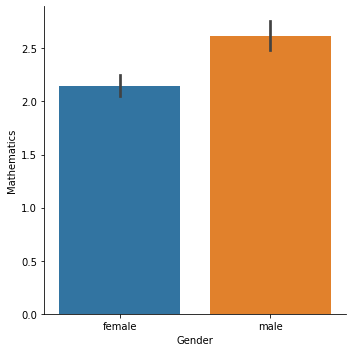

In [66]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x="Gender", y="Mathematics", 
            data=ypsr, kind="bar")

# Show plot
plt.show()

#### Customizing bar plots

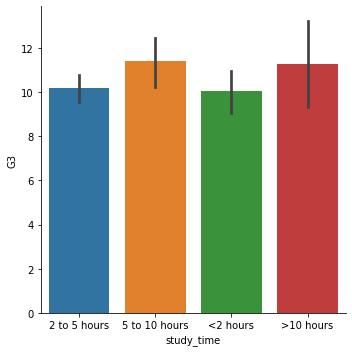

In [67]:
# Create bar plot of average final grade in each study category
sns.catplot(x="study_time", y="G3", 
            data=sac, kind="bar")

# Show plot
plt.show()

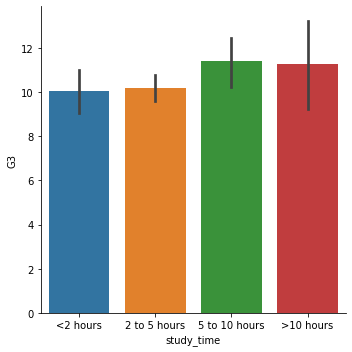

In [68]:
# Rearrange the categories
sns.catplot(x="study_time", y="G3",
            data=sac,
            kind="bar", order=["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"])

# Show plot
plt.show()

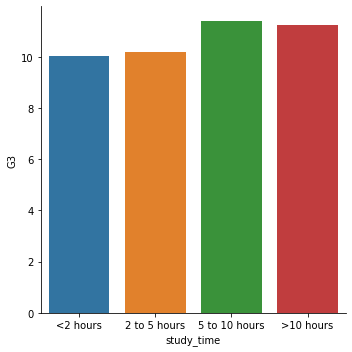

In [69]:
# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=sac,
            kind="bar",
            order=["<2 hours", 
                   "2 to 5 hours", 
                   "5 to 10 hours", 
                   ">10 hours"], ci=None)

# Show plot
plt.show()

#### Creating a box plot

What is a box plot?
- Shows the distribution of quantitative data
- See median, spread, skewness, and outliers
- Facilitates comparisons between groups

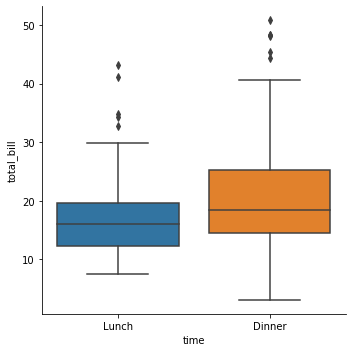

In [70]:
# How to create a box plot
g = sns.catplot(x="time", y="total_bill", 
                data=tips, kind="box")
plt.show()

#### Change the order of categories

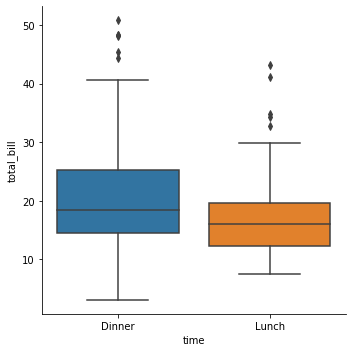

In [71]:
g = sns.catplot(x="time", y="total_bill", data=tips, 
                kind="box", order=["Dinner", "Lunch"])
plt.show()

#### Omitting the outliers using `sym`

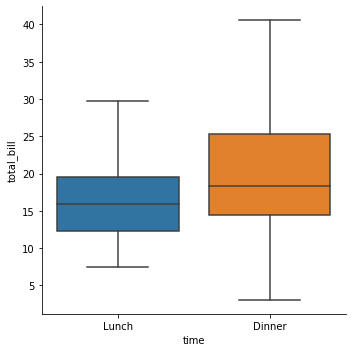

In [72]:
g = sns.catplot(x="time", y="total_bill", 
                data=tips, kind="box", sym="")
plt.show()

#### Changing the whiskers using `whis`
- By default, the whiskers extend to 1.5 * the interquartile range
- Make them extend to 2.0 * IQR: whis=2.0
- Show the 5th and 95th percentiles: whis=[5, 95]
- Show min and max values: whis=[0, 100]

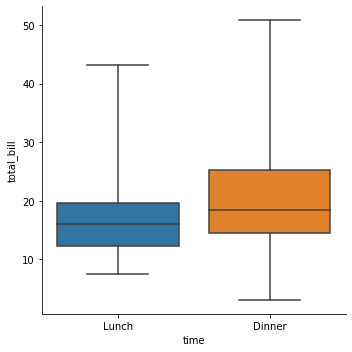

In [73]:
g = sns.catplot(x="time", y="total_bill", 
                data=tips, kind="box", whis=[0, 100])
plt.show()

#### Create and interpret a box plot

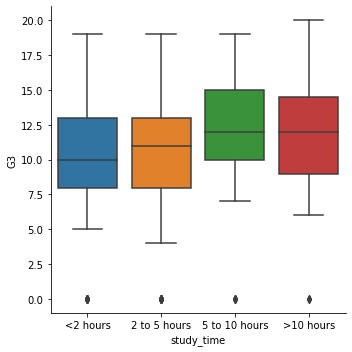

In [74]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x="study_time", y="G3", data=sac, kind="box", order=study_time_order)

# Show plot
plt.show()

#### Omitting outliers

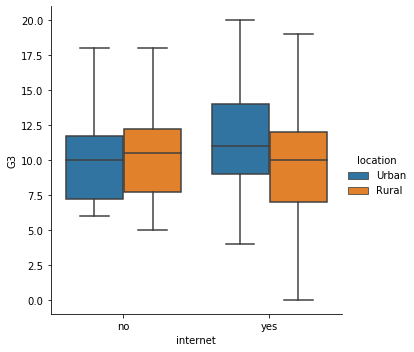

In [75]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x="internet", y="G3", kind="box", 
            data=sac, hue="location", sym="")

# Show plot
plt.show()

#### Adjusting the whiskers

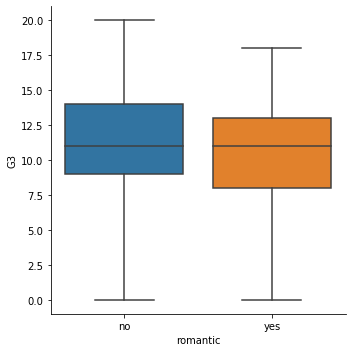

In [76]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3",
            data=sac,
            kind="box", whis=[0, 100])

# Show plot
plt.show()

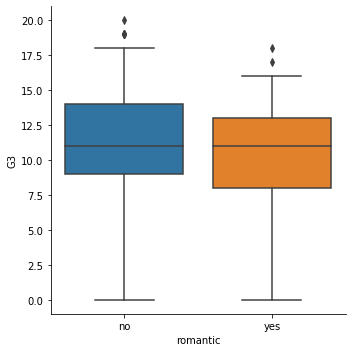

In [77]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=sac,
            kind="box",
            whis=[5, 95])

# Show plot
plt.show()

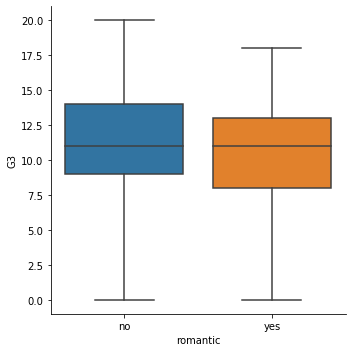

In [78]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=sac,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

#### Point plots

What are point plots?
- Points show mean of quantitative variable
- Vertical lines show 95% confidence intervals

#### Point plots vs. line plots

Both show:
- Mean of quantitative variable
- 95% confidence intervals for the mean

Differences:
- Line plot has quantitative variable (usually time) on x-axis
- Point plot has categorical variable on x-axis

#### Point plots vs. bar plots

Both show:
- Mean of quantitative variable
- 95% confidence intervals for the mean

#### Creating a point plot

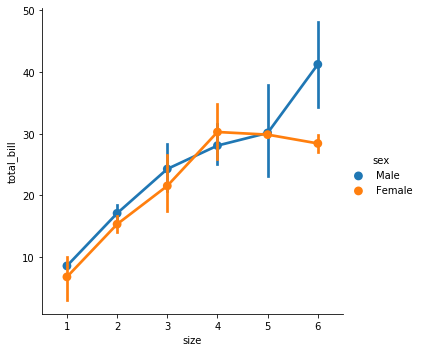

In [79]:
sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

#### Disconnecting the points

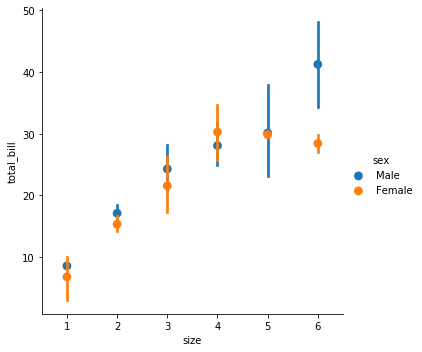

In [80]:
sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", 
            kind="point", join=False)
plt.show()

#### Displaying the median

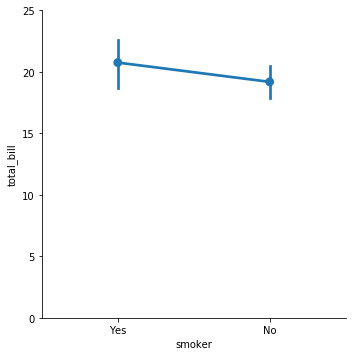

In [81]:
sns.catplot(x="smoker", y="total_bill", 
            data=tips, kind="point")

plt.ylim(0, 25)
plt.show()

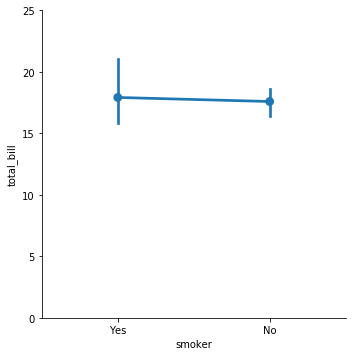

In [82]:
from numpy import median

sns.catplot(x="smoker", y="total_bill", 
            data=tips, kind="point", 
            estimator=median)

plt.ylim(0, 25)
plt.show()

#### Customizing the confidence intervals

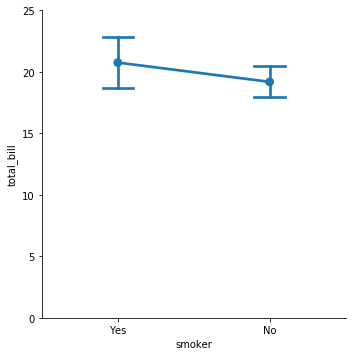

In [83]:
sns.catplot(x="smoker", y="total_bill", 
            data=tips, kind="point", capsize=0.2)

plt.ylim(0, 25)
plt.show()

#### Turning off confidence intervals

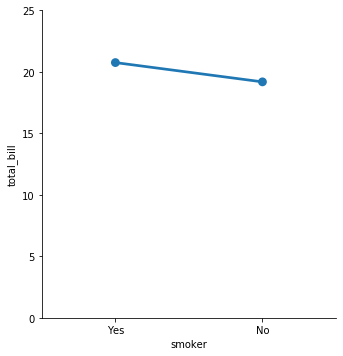

In [84]:
sns.catplot(x="smoker", y="total_bill", 
            data=tips, kind="point", ci=None)

plt.ylim(0, 25)
plt.show()

#### Customizing point plots

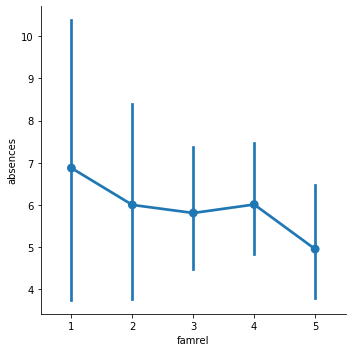

In [85]:
# Create a point plot of family relationship vs. absences
sns.catplot(data=sac, x="famrel", 
            y="absences", kind="point")
            
# Show plot
plt.show()

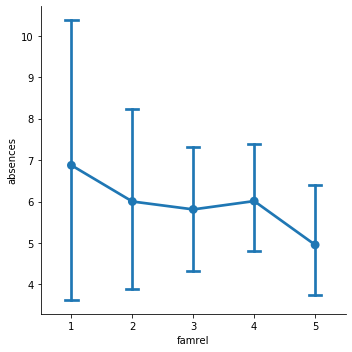

In [86]:
# Add caps to the confidence interval
sns.catplot(x="famrel", y="absences", 
            data=sac, kind="point", capsize=0.2)
        
# Show plot
plt.show()

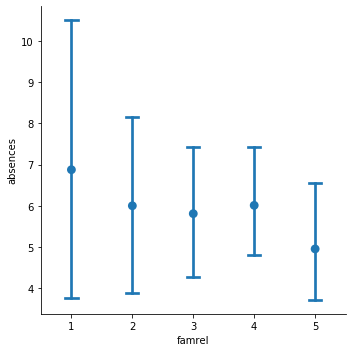

In [87]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences", 
            data=sac, kind="point",
            capsize=0.2, join=False)
            
# Show plot
plt.show()

#### Point plots with subgroups

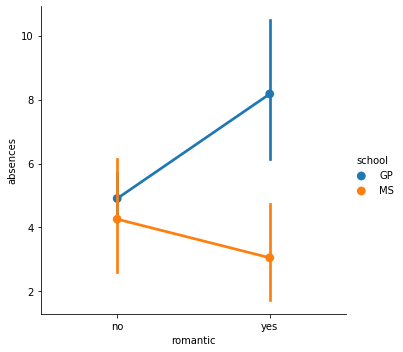

In [88]:
# Create a point plot with subgroups
sns.catplot(data=sac, x="romantic", 
            y="absences", hue="school", kind="point")

# Show plot
plt.show()

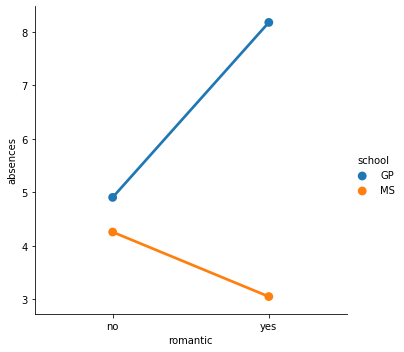

In [89]:
# Turn off the confidence intervals for this plot
sns.catplot(x="romantic", y="absences", data=sac,
            kind="point", hue="school", ci=None)

# Show plot
plt.show()

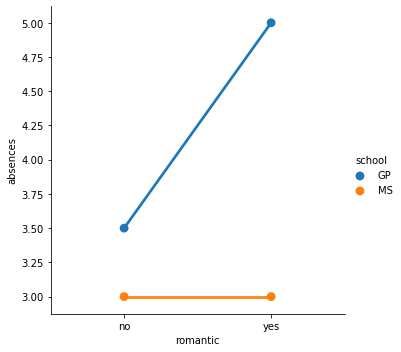

In [90]:
# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences", data=sac, 
            kind="point", hue="school", ci=None, estimator=median)

# Show plot
plt.show()

# 4. Changing plot style and color

#### Why customize?
Reasons to change style:
- Personal preference
- Improve readability
- Guide interpretation

#### Changing the figure style
- Figure "style" includes background and axes
- Preset options: "white", "dark", "whitegrid", "darkgrid", "ticks"
- `sns.set_style()`

#### Default figure style ("white")

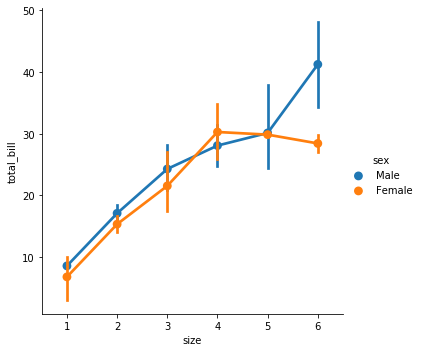

In [91]:
sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

#### Figure style: "whitegrid"

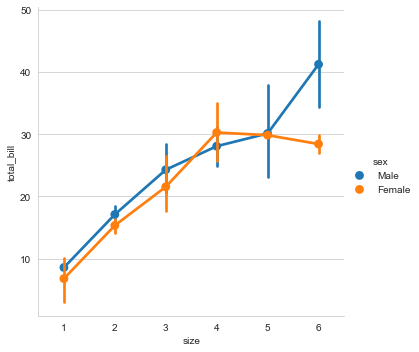

In [92]:
sns.set_style("whitegrid")

sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

#### Other styles

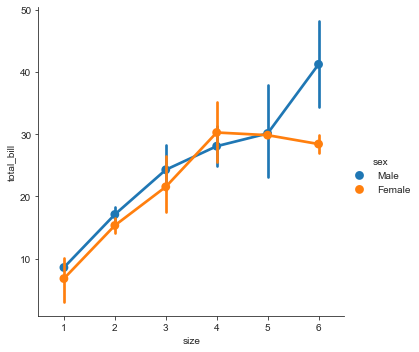

In [93]:
sns.set_style("ticks")

sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

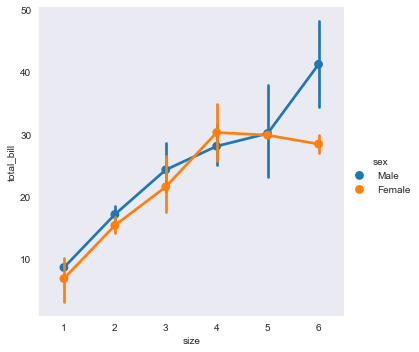

In [94]:
sns.set_style("dark")

sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

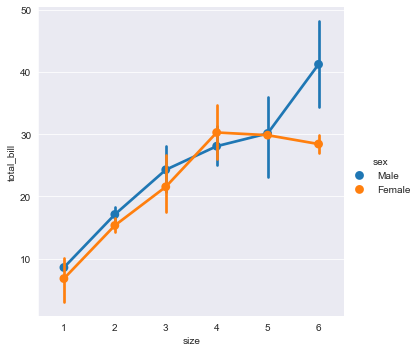

In [95]:
sns.set_style("darkgrid")

sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

#### Changing the palette
- Figure "palette" changes the color of the main elements of the plot
- `sns.set_palette()`
- Use preset palettes or create a custom palette

<img style="width: 300px;" src="img/diverging-palletes.png">

<img style="width: 300px;" src="img/sequential-palettes.png">

#### Example (default palette)

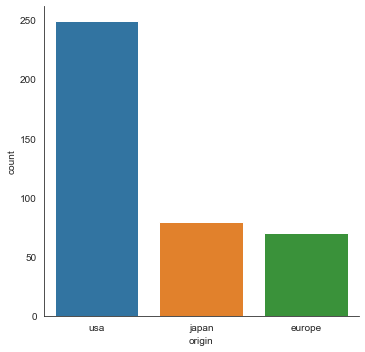

In [97]:
sns.set_style("white")

category_order = ["usa", 
                  "japan", 
                  "europe"]

sns.catplot(x="origin", data=mpg, 
            kind="count", order=category_order)

plt.show()

#### Example (diverging palette)

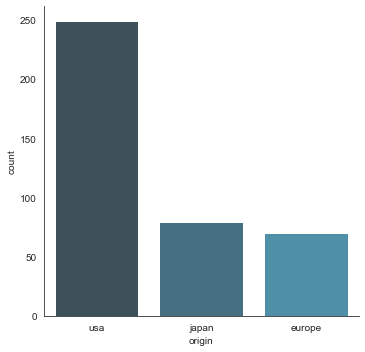

In [98]:
sns.set_palette("GnBu_d")

category_order = ["usa", 
                  "japan", 
                  "europe"]

sns.catplot(x="origin", data=mpg, 
            kind="count", order=category_order)

plt.show()

#### Custom palettes

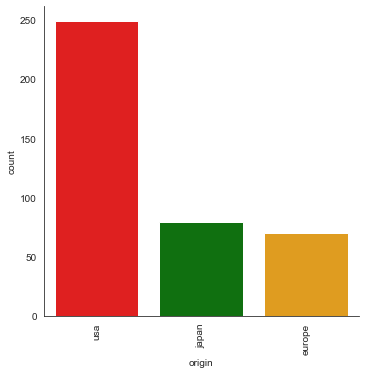

In [99]:
custom_palette = ["red", "green", "orange", "blue", "yellow", "purple"]

sns.set_palette(custom_palette)

category_order = ["usa", 
                  "japan", 
                  "europe"]

sns.catplot(x="origin", data=mpg, 
            kind="count", order=category_order)

plt.xticks(rotation=90)
plt.show()

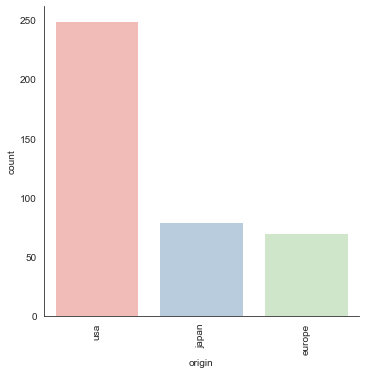

In [100]:
custom_palette = ['#FBB4AE', '#B3CDE3', '#CCEBC5', 
                  '#DECBE4', '#FED9A6', '#FFFFCC', 
                  '#E5D8BD', '#FDDAEC', '#F2F2F2']

sns.set_palette(custom_palette)

category_order = ["usa", 
                  "japan", 
                  "europe"]

sns.catplot(x="origin", data=mpg, 
            kind="count", order=category_order)

plt.xticks(rotation=90)
plt.show()

#### Default context: "paper"

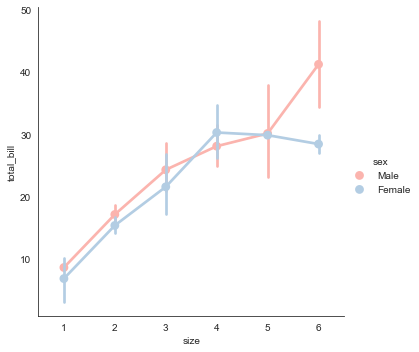

In [103]:
sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

#### Larger context: "talk"

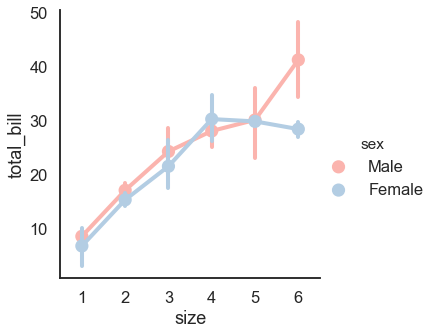

In [104]:
sns.set_context("talk")

sns.catplot(x="size", y="total_bill", 
            data=tips, hue="sex", kind="point")
plt.show()

#### Changing style and palette

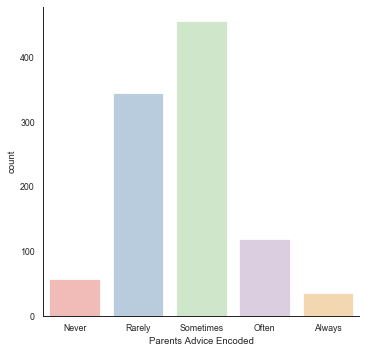

In [106]:
# Set the context to "paper"
sns.set_context("paper")

# Create a new encoded series from Parents advice
ypsr['Parents Advice Encoded'] = ypsr['Parents advice'].map({1: 'Always', 2: 'Often', 
                                                             3: 'Sometimes', 4: 'Rarely', 5: 'Never'})

# Set the style to "whitegrid"
sns.set_style("white")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice Encoded",  data=ypsr, 
            kind="count", order=category_order)

# Show plot
plt.show()

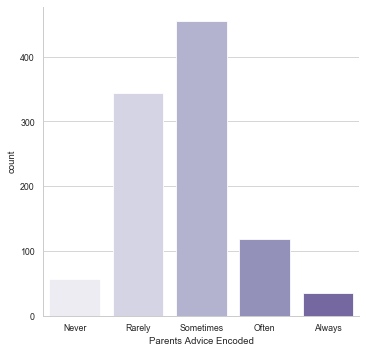

In [107]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice Encoded", 
            data=ypsr, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

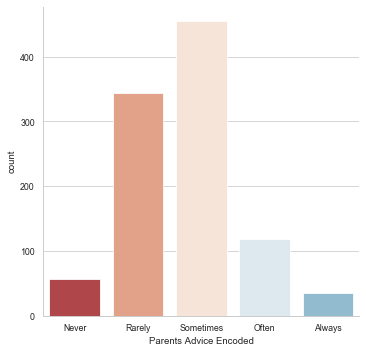

In [108]:
# Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice Encoded", 
            data=ypsr, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

#### Changing the scale

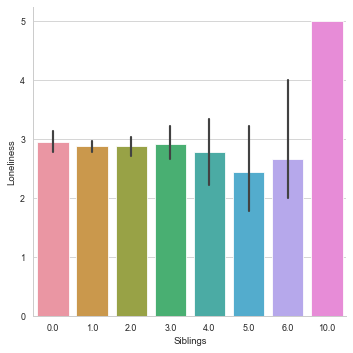

In [109]:
# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=ypsr, kind="bar")

# Show plot
plt.show()

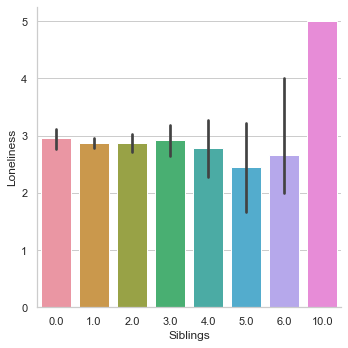

In [110]:
# Change the context to "notebook"
sns.set_context("notebook")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=ypsr, kind="bar")

# Show plot
plt.show()

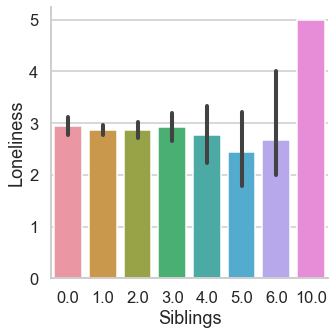

In [111]:
# Change the context to "talk"
sns.set_context("talk")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=ypsr, kind="bar")

# Show plot
plt.show()

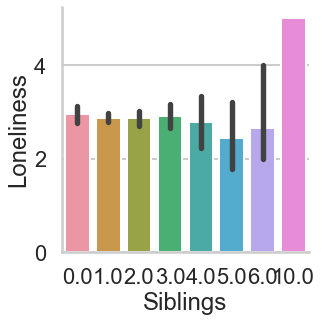

In [112]:
# Change the context to "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=ypsr, kind="bar")

# Show plot
plt.show()

#### Using a custom palette

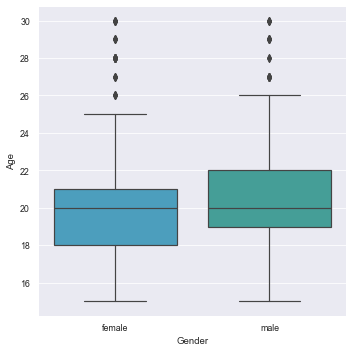

In [114]:
# Change the context to "poster"
sns.set_context("paper")

# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette
custom_palette = ['#39A7D0', '#36ADA4']
sns.set_palette(custom_palette)

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=ypsr, kind="box")

# Show plot
plt.show()

#### Adding titles and labels: Part 1

<img style="width: 1000px;" src="img/creating-informative-visualizations.png">

#### FacetGrid vs. AxesSubplot objects
Seaborn plots create two different types of objects: FacetGrid and AxesSubplot

matplotlib.axes._subplots.AxesSubplot

An Empty AxesSubplot


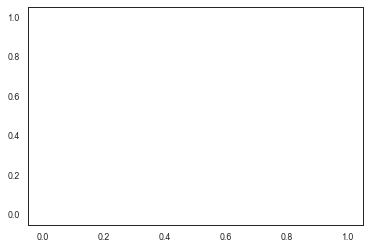

In [116]:
# Set the style to "white"
sns.set_style("white")

data = {'height': [], 'weight': []}
df = pd.DataFrame(data=data)

g = sns.scatterplot(x="height", y="weight", data=df)
display(type(g))

print("An Empty AxesSubplot")

<img style="width: 500px;" src="img/an-empty-facetgrid.png">

#### Adding a title to FacetGrid

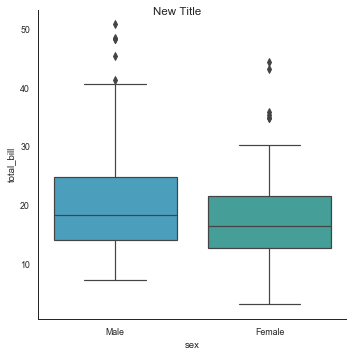

In [117]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box")

g.fig.suptitle("New Title")
plt.show()

#### Adjusting height of title in FacetGrid

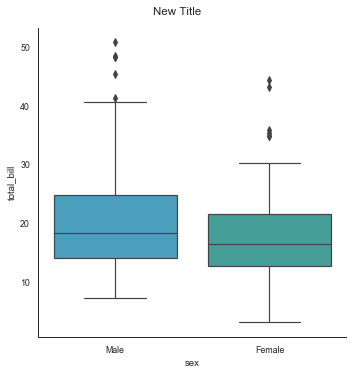

In [118]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box")

g.fig.suptitle("New Title", y=1.03)
plt.show()

#### FacetGrids vs. AxesSubplots

<class 'seaborn.axisgrid.FacetGrid'>


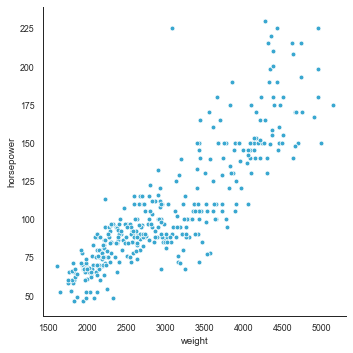

In [119]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

#### Adding a title and axis labels

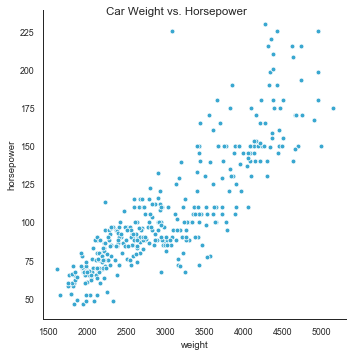

In [120]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()

#### Adding titles and labels: Part 2

Text(0.5, 1.03, 'New Title')

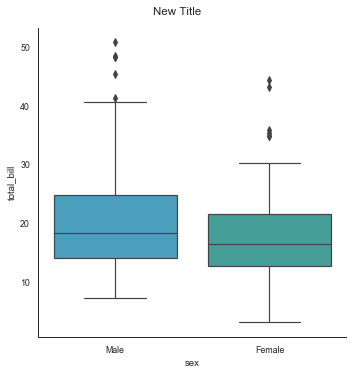

In [121]:
# FacetGrid
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box")

g.fig.suptitle("New Title", y=1.03)

Text(0.5, 1.03, 'New Title')

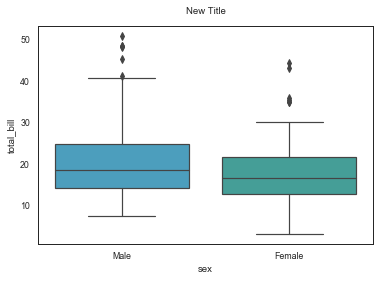

In [122]:
# AxesSubplot
g = sns.boxplot(x="sex", y="total_bill", 
                data=tips)

g.set_title("New Title", y=1.03)

#### Titles for subplots

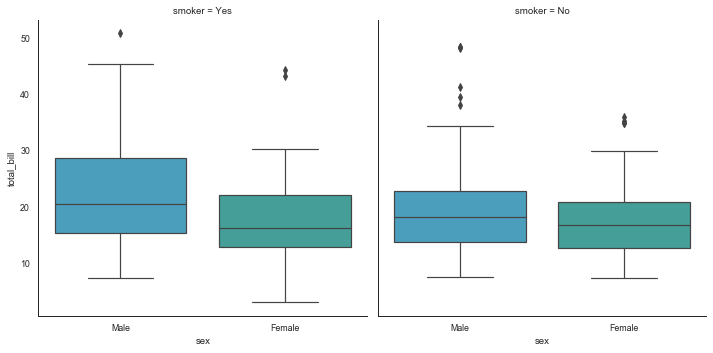

In [123]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box", col="smoker")

Text(0.5, 1.03, 'New Title')

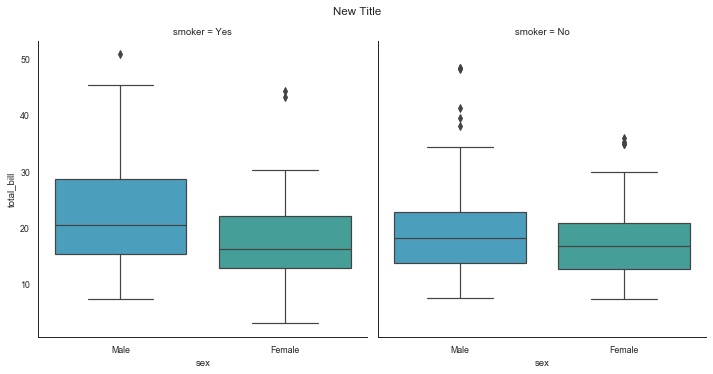

In [124]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box", col="smoker")

g.fig.suptitle("New Title", y=1.03)

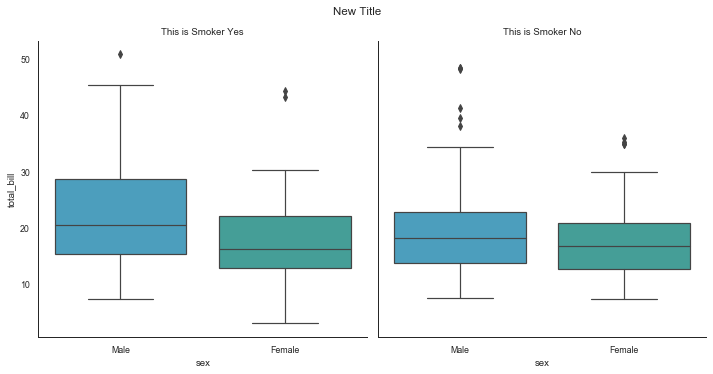

In [125]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box", col="smoker")

g.fig.suptitle("New Title", y=1.03)
g.set_titles("This is Smoker {col_name}")

#### Adding axis labels

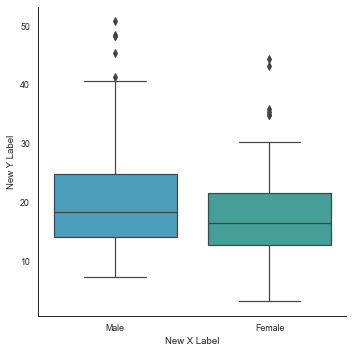

In [126]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box")

g.set(xlabel="New X Label", ylabel="New Y Label")
plt.show()

#### Rotating x-axis tick labels

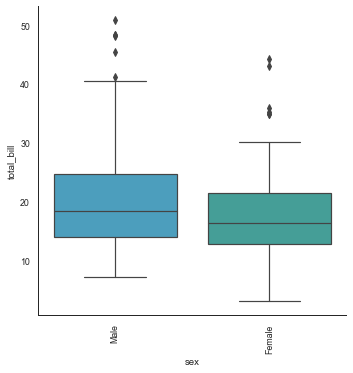

In [127]:
g = sns.catplot(x="sex", y="total_bill", 
                data=tips, kind="box")

plt.xticks(rotation=90)
plt.show()

#### Adding a title and axis labels

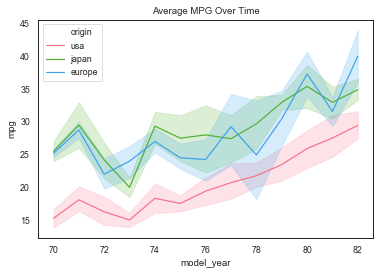

In [128]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Show plot
plt.show()

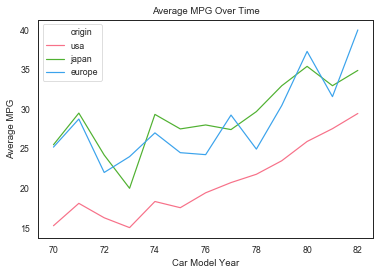

In [129]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg,
                 hue="origin", ci=None)

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", ylabel="Average MPG")

# Show plot
plt.show()

#### Rotating x-tick labels

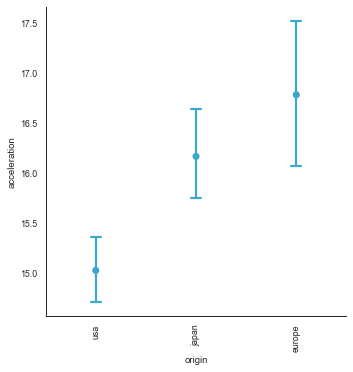

In [130]:
# Create point plot
sns.catplot(x="origin", y="acceleration", data=mpg, 
            kind="point", join=False, capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

#### Putting it all together

Getting started
- To import Seaborn:
`import seaborn as sns`
- To import Matplotlib:
`import matplotlib.pyplot as plt`
- To show a plot:
`plt.show()`

#### Relational plots
- Show the relationship between two quantitative variables
- Examples: scatter plots, line plots
- `sns.relplot(x="x_variable_name", y="y_variable_name", data=pandas_df, kind="scatter")`

#### Categorical plots
Show the distribution of a quantitative variable within categories defined by a categorical variable
- Examples: bar plots, count plots, box plots, point plots
- `sns.catplot(x="x_variable_name", y="y_variable_name", data=pandas_df, kind="bar")`

#### Adding a third variable (hue)
Setting `hue` will create subgroups that are displayed as different colors on a single plot

#### Adding a third variable (row/col)
Setting `row` and/or `col` in `relplot()` or `catplot()` will create subgroups that are displayed on separate subplots.

#### Customization
- Change the background: `sns.set_style()`
- Change the main element colors: `sns.set_palette()`
- Change the scale: `sns.set_context()`

| Object Type | Plot Types | How to Add Title |
| --- | --- | --- |
| `FacetGrid` | `relplot()` , `catplot()` | `g.fig.suptitle()` |
| `AxesSubplot` | `scatterplot()` , `countplot()` , etc. | `g.set_title()` |

#### Final touches
- Add x- and y-axis labels:
`g.set(xlabel="new x-axis label", ylabel="new y-axis label")`
- Rotate x-tick labels:
`plt.xticks(rotation=90)`


##### Box plot with subgroups

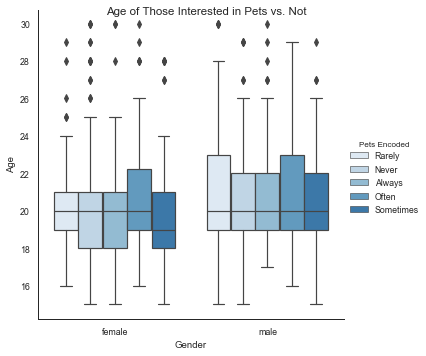

In [131]:
# Create a new encoded series from Pets
ypsr['Pets Encoded'] = ypsr['Pets'].map({1: 'Always', 2: 'Often', 
                                         3: 'Sometimes', 4: 'Rarely', 5: 'Never'})

# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=ypsr, 
                kind="box", hue="Pets Encoded")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

#### Bar plot with subgroups and subplots

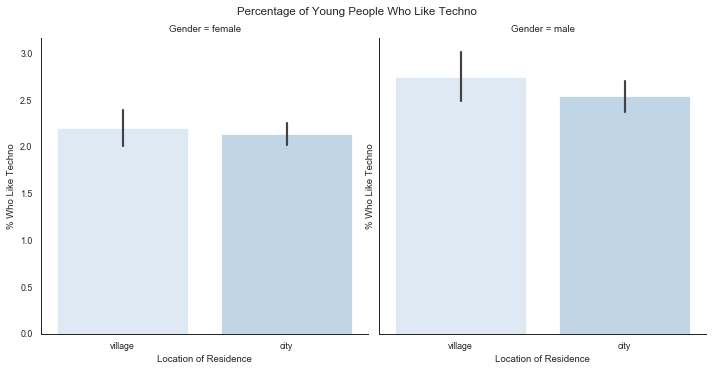

In [134]:
# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno", 
                data=ypsr, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", ylabel="% Who Like Techno")

# Show plot
plt.show()

# What's next?

<img style="width: 500px;" src="img/where-does-seaborn-fit-in.png">

#### Next Steps: Explore and communicate results
- Seaborn advanced visualizations
- Matplotlib advanced customizations

<img style="width: 500px;" src="img/gather-data.png">

#### Next steps: Gather data
- Python
- SQL

<img style="width: 500px;" src="img/clean-and-transform.png">

#### Next steps: Transform and clean
- Getting data into Pandas DataFrames
- Cleaning data
- Transforming into tidy format

<img style="width: 500px;" src="img/analyze-and-build-models.png">

#### Next steps: Analyze and build models
- Statistical analysis
- Calculating and interpreting con